#**PROBLEMA DE NEGOCIO**


---




##Una cadena de Supermercados Online que opera en Brasil quiere obtener insights sobre la venta de sus productos. Para hacer esto, usted, como científico de datos, deberá analizar los pedidos de sus clientes y mostrar gráficamente las respuestas de las siguientes preguntas de negocio:

### **Preguntas**

1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

3. Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

5. ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

6. ¿Existe otro insight que puedas proporcionar?

#**1. Configuración del Ambiente**


---




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2. Obtención y Tratamiento de Datos**


---




In [ ]:
import pandas as pd

# Definición de la función
def obtencion_datos():
    # Paso 1: Variables globales
    global df_ventas
    global df_ventas_limpio

    # Paso 2: Obtención de los datos
    # Cargar archivo "reporte_ventas.csv" en df_ventas
    df_ventas = pd.read_csv("/content/drive/MyDrive/csv/reporte_ventas.csv")

    # Formatear columnas de fechas a formato datetime
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

    # Eliminar registros duplicados y guardar en df_ventas_limpio
    df_ventas_limpio = df_ventas.drop_duplicates()

    # Eliminar registros de prueba en la columna 'nombre_cliente' y guardar en df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']

    # Eliminar registros con valor nulo en la columna 'nombre_cliente' y guardar en df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])

    # Filtrar operaciones sin ganancia y guardar en df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]

    # Actualizar el índice del dataframe final
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)

    # Mostrar el resultado (puedes ajustar según tus necesidades)
    print(df_ventas_limpio)

# Llamada a la función
obtencion_datos()

     fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0      2021-11-09  2021-11-12         Económico    Thiago Silveira   
1      2021-11-09  2021-11-12         Económico    Thiago Silveira   
2      2021-06-13  2021-06-17         Económico      Giovanna Lima   
3      2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4      2019-06-10  2019-06-15  Entrega estándar        Sophia Dias   
...           ...         ...               ...                ...   
7205   2021-09-30  2021-10-04  Entrega estándar     Enrique Santos   
7206   2022-11-18  2022-11-22  Entrega estándar    Heitor Silveira   
7207   2022-11-18  2022-11-22  Entrega estándar    Heitor Silveira   
7208   2019-01-22  2019-01-24         Económico      Isabel Araújo   
7209   2022-05-05  2022-05-10         Económico   Esther Rodrigues   

     segmento_cliente          ciudad               estado   region  \
0                 B2C  Ribeirão Preto            São Paulo  Sureste   
1                

In [ ]:
#Ejecutando limpieza
obtencion_datos()
print('Información:')
print(df_ventas_limpio.info())
print('------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

     fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0      2021-11-09  2021-11-12         Económico    Thiago Silveira   
1      2021-11-09  2021-11-12         Económico    Thiago Silveira   
2      2021-06-13  2021-06-17         Económico      Giovanna Lima   
3      2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4      2019-06-10  2019-06-15  Entrega estándar        Sophia Dias   
...           ...         ...               ...                ...   
7205   2021-09-30  2021-10-04  Entrega estándar     Enrique Santos   
7206   2022-11-18  2022-11-22  Entrega estándar    Heitor Silveira   
7207   2022-11-18  2022-11-22  Entrega estándar    Heitor Silveira   
7208   2019-01-22  2019-01-24         Económico      Isabel Araújo   
7209   2022-05-05  2022-05-10         Económico   Esther Rodrigues   

     segmento_cliente          ciudad               estado   region  \
0                 B2C  Ribeirão Preto            São Paulo  Sureste   
1                

#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?**

    año  total_venta
0  2019   1052735.86
1  2020   1190541.40
2  2021   1535801.44
3  2022   1825927.50


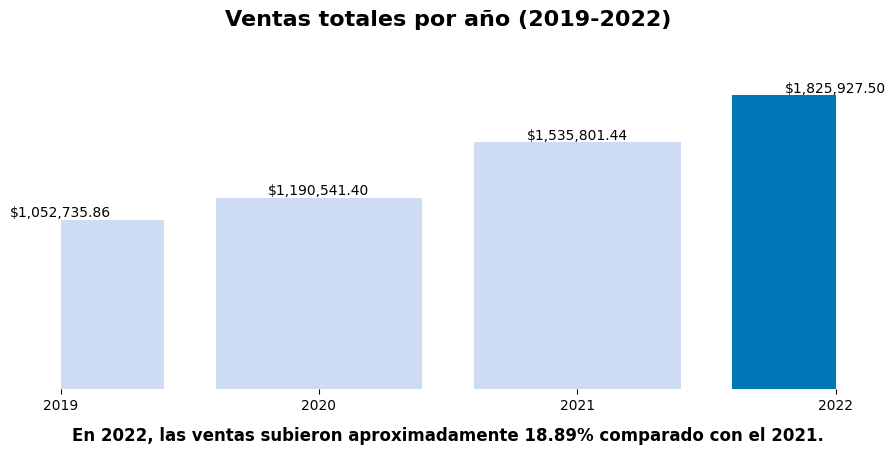

In [ ]:
def pregunta_1():
    %matplotlib inline
    global df_ventas_año
    global df_ventas_limpio
    # Suponiendo que df_ventas_limpio es tu DataFrame original
    # y que ya está cargado con los datos

    # Crear una copia de df_ventas_limpio
    df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

    # Verificar si la columna 'fecha_pedido' está en formato de fecha
    if not pd.api.types.is_datetime64_any_dtype(df_ventas_año['fecha_pedido']):
        print("Error: La columna 'fecha_pedido' no está en formato de fecha.")
        return

    # Crear una nueva columna 'año' en df_ventas_año
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year

    # Verificar si todos los valores en la columna 'año' son enteros
    if not df_ventas_año['año'].apply(lambda x: isinstance(x, int)).all():
        print("Error: La columna 'año' no contiene años enteros.")
        return

    # Eliminar la columna 'fecha_pedido'
    df_ventas_año.drop('fecha_pedido', axis=1, inplace=True)

    # Agrupar por la columna 'año' y sumarizar los valores de 'total_venta'
    df_ventas_año = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()

    # Mostrar el resultado
    print(df_ventas_año)


    # Configuración de la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Datos para el gráfico
    ejeX = df_ventas_año['año']
    ejeY = df_ventas_año['total_venta']
    colores = ['#CDDBF3'] * (len(df_ventas_año) - 1) + ['#0077b6']  # Último año en color diferente
    width = 0.8

    # Crear el gráfico de barras verticales
    ax.bar(ejeX, ejeY, color=colores, width=width)

    ax.set_xticks(ax.get_xticks()[::2])  # Mostrar cada segunda etiqueta

    # Colocar los valores sobre cada barra
    for bar in ax.patches:
        valor = bar.get_height()
        qtd = f"${valor:,.2f}"  # Formatear el valor con formato de dólar
        ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd,
                ha='center', va='bottom')

    # Rotar las etiquetas del eje X para mayor claridad (opcional)
    # plt.xticks(rotation=45, ha='right')

    # Texto adicional a la derecha del título
    primer_año = int(df_ventas_año['año'].min())
    ultimo_año = int(df_ventas_año['año'].max())
    ventas_ultimo_año = df_ventas_año.loc[df_ventas_año['año'] == ultimo_año, 'total_venta'].values[0]
    ventas_año_anterior = df_ventas_año.loc[df_ventas_año['año'] == ultimo_año - 1, 'total_venta'].values[0]
    porcentaje_aumento = ((ventas_ultimo_año - ventas_año_anterior) / ventas_año_anterior) * 100

    etiqueta = f"En {ultimo_año}, las ventas subieron aproximadamente {porcentaje_aumento:.2f}% comparado con el {ultimo_año-1}."
    #fig.suptitle(etiqueta, fontsize=11, y=0.96)


    # Configuración adicional del gráfico (puedes ajustar según tus necesidades)
    ax.set_title(f'Ventas totales por año ({primer_año}-{ultimo_año})',fontsize=16,pad=40,fontweight='bold')
    ax.set_xlabel('Año')
    ax.set_ylabel('Total Venta ($)')

    # Quitar el borde del plano de coordenadas
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Quitar los labels del eje y
    ax.get_yaxis().set_visible(False)

    ax.set_xlabel('')

    ax.tick_params(axis='x', rotation=0)

    plt.xlim(min(df_ventas_año['año']), max(df_ventas_año['año']))


    ax.text(0.5, -0.15, etiqueta, ha='center', va='center', fontsize=12, fontweight='bold', transform=ax.transAxes)
    ax.text(0.5, -0.20, "", ha='center', va='center', fontsize=10, fontweight='bold', transform=ax.transAxes)

    # Mostrar el gráfico
    plt.show()

pregunta_1()

##**Pregunta 2: ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?**

            tipo_producto  departamento_producto  total_ganancia
11           Lámparas LED           Electrónicos       111453.41
8                 Laptops           Electrónicos        91148.67
4       Cámaras digitales           Electrónicos        80192.63
13            Smartphones           Electrónicos        64705.58
7                   Jeans                   Ropa        55982.95
6   Detergente para ropas  Productos de Limpieza        55766.39
1        Bolsas de basura  Productos de Limpieza        53328.46


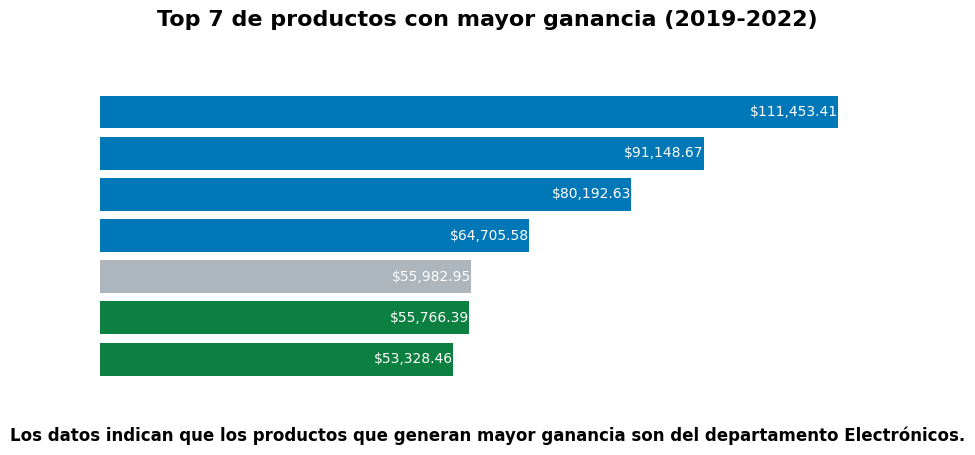

In [ ]:


# Definición de la función
def pregunta_2():
    # Paso 1: Variables globales
    global df_ventas_limpio
    global df_top_ganancias

    # Paso 2: Preparación de los datos
    # Crea una copia de df_ventas_limpio
    df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia', 'departamento_producto']].copy()

    # Agrupar por 'tipo_producto', sumarizar 'total_ganancia' y ordenar en orden descendente
    df_top_ganancias = df_top_ganancias.groupby(['tipo_producto', 'departamento_producto']).aggregate({'total_ganancia': 'sum'}).reset_index()
    df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)

    # Seleccionar los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)

    # Mostrar el resultado (puedes ajustar según tus necesidades)
    print(df_top_ganancias)


    # Crear una figura y un eje con la configuración especificada
    fig, ax = plt.subplots(figsize=(10, 4))

    # Datos para el gráfico de barras horizontales
    ejeX = df_top_ganancias['total_ganancia']
    ejeY = df_top_ganancias['tipo_producto']
    colores_departamento = df_top_ganancias['departamento_producto'].map({'Electrónicos': '#0077b6', 'Ropa': '#adb5bd', 'Productos de Limpieza': '#0C8040'}).dropna()

    # Crear el gráfico de barras horizontales
    ax.barh(ejeY, ejeX, color=colores_departamento, align='center')

    ax.invert_yaxis()

    # Colocar los valores sobre cada barra
    for i, valor in enumerate(df_top_ganancias['total_ganancia']):
        qtd = f"${valor:,.2f}"  # Formatear el valor con formato de dólar
        ax.text(valor, i, qtd, ha='right', va='center', color='white')

    # Texto adicional a la derecha del título
    primer_año = int(df_ventas_año['año'].min())
    ultimo_año = int(df_ventas_año['año'].max())

    departamento_mayor_ganancia = df_ventas_limpio.loc[df_ventas_limpio['total_ganancia'].idxmax(), 'departamento_producto']

    etiqueta = (
        f"Los datos indican que los productos que generan mayor ganancia son del departamento {departamento_mayor_ganancia}.")



    # Agregar la etiqueta debajo del título
    #fig.suptitle(etiqueta, fontsize=11, y=0.96)

    # Configuración adicional del gráfico (puedes ajustar según tus necesidades)
    ax.set_title(f'Top 7 de productos con mayor ganancia ({primer_año}-{ultimo_año})',fontsize=16,pad=40,fontweight='bold')
    ax.set_xlabel('Total Ganancia ($)')
    ax.set_ylabel('Tipo de Producto')

    # Quitar el borde del plano de coordenadas
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Quitar los labels del eje y
    ax.get_yaxis().set_visible(False)

    ax.set_xlabel('')

    ax.tick_params(axis='x', rotation=0)

    ax.set_xticks([])


    ax.text(0.5, -0.15, etiqueta, ha='center', va='center', fontsize=12, fontweight='bold', transform=ax.transAxes)
    ax.text(0.5, -0.20, "", ha='center', va='center', fontsize=10, fontweight='bold', transform=ax.transAxes)

    # Mostrar el gráfico
    plt.show()
# Llamada a la función
pregunta_2()


##**Pregunta 3: Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?**

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019    522953.51  346407.40      67406.37   71778.74   44189.84
2020    648732.79  282431.39      90616.80  107309.38   61451.04
2021    870894.51  359829.92     125344.52   69534.02  110198.47
2022    980404.44  549254.20      97679.64   99195.86   99393.36


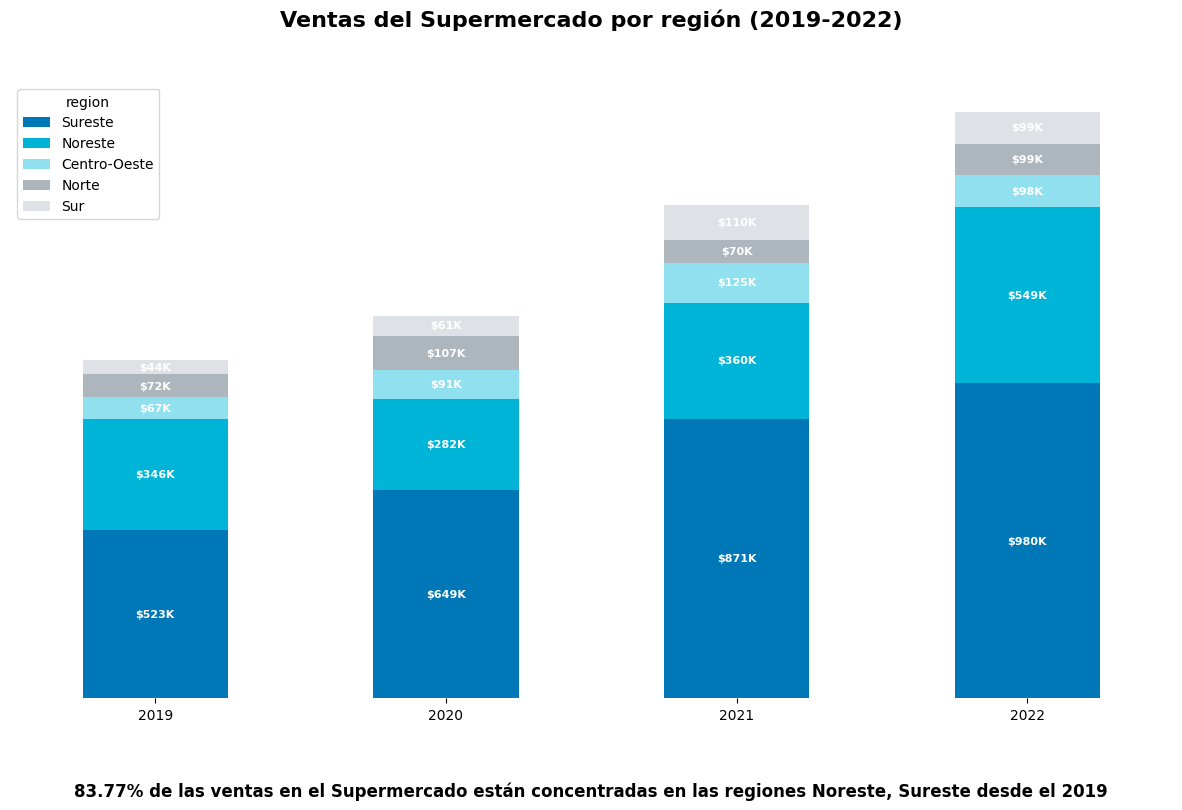

In [ ]:
# Definición de la función
def pregunta_3():
    # Paso 1: Variables globales (si aún no están definidas)
    global df_ventas_limpio
    global df_ventas_año_region

    # Paso 2: Preparación de los datos
    # Crea una copia de la base df_ventas_limpio en un nuevo dataframe df_ventas_año_region
    df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()

    # Crea una nueva columna en df_ventas_año_region llamada año
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year

    # Elimina la columna fecha_pedido de df_ventas_año_region
    df_ventas_año_region.drop('fecha_pedido', axis=1, inplace=True)

    # Genera una tabla cruzada con el método pd.crosstab
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values=df_ventas_año_region['total_venta'], aggfunc="sum")

    # Cambia el orden de las columnas en el DataFrame
    new_order = ['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']
    df_ventas_año_region = df_ventas_año_region[new_order]

    # Muestra el resultado del dataframe df_ventas_año_region
    print(df_ventas_año_region)

    # Crea una lista con 5 colores, uno por cada región
    colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

    # Visualización del gráfico de columnas apiladas
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)

    # Colocar valores dentro de cada contenedor de la pila de barras
    for i, container in enumerate(ax.containers):
        for j, rect in enumerate(container.patches):
            value = rect.get_height()
            if value > 0:  # Mostrar etiqueta solo si el valor es mayor que cero
                formatted_value = f"${round(value / 1000):,d}K"  # Redondear y convertir a entero
                ax.text(rect.get_x() + rect.get_width() / 2,
                        rect.get_y() + rect.get_height() / 2,
                        formatted_value,
                        ha='center', va='center', color='white', fontsize=8, fontweight='bold')

    # Configurar el título y el subtítulo
    ax.set_title('Ventas del Supermercado por región (2019-2022)', fontsize=16, pad=40, fontweight='bold')

    ultimo_año = df_ventas_limpio['fecha_pedido'].dt.year.max()
    df_ventas_año_region = df_ventas_limpio[df_ventas_limpio['fecha_pedido'].dt.year == ultimo_año].copy()

    # Crea una nueva columna en df_ventas_año_region llamada año
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year

    # Elimina la columna fecha_pedido de df_ventas_año_region
    df_ventas_año_region.drop('fecha_pedido', axis=1, inplace=True)

    # Genera una tabla cruzada con el método pd.crosstab
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values=df_ventas_año_region['total_venta'], aggfunc="sum")

     # Calcula las ventas totales de todas las regiones
    ventas_totales_todas_region = df_ventas_año_region.sum().sum()

    # Filtra las regiones cuyo total de ventas sea mayor al 25% de las ventas de todas las regiones
    regiones_seleccionadas = df_ventas_año_region.columns[df_ventas_año_region.sum() > 0.25 * ventas_totales_todas_region]


    # Calcula y muestra la suma de los porcentajes de cada región que superó la condición
    suma_porcentajes = df_ventas_año_region[regiones_seleccionadas].sum() / ventas_totales_todas_region
    suma_porcentajes_text = f"{suma_porcentajes.sum() * 100:.2f}% de las ventas en el Supermercado están concentradas en las regiones {', '.join(regiones_seleccionadas)} desde el 2019"

    #print(f"\nSuma de los porcentajes de las regiones seleccionadas: {suma_porcentajes.sum() * 100:.2f}%")

    # Imprime las categorías (regiones)
    #print("\nCategorías (Regiones):")
    #for region in regiones_seleccionadas:
        #print(f"{region}: {suma_porcentajes[region] * 100:.2f}%")

    ax.text(0.5, -0.15, suma_porcentajes_text, ha='center', va='center', fontsize=12, fontweight='bold', transform=ax.transAxes)
    ax.text(0.5, -0.20, "", ha='center', va='center', fontsize=10, fontweight='bold', transform=ax.transAxes)


    # Quitar el borde del plano de coordenadas
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Quitar los labels del eje y
    ax.get_yaxis().set_visible(False)

    ax.set_xlabel('')

    ax.tick_params(axis='x', rotation=0)

    plt.show()


# Llamada a la función
pregunta_3()


##**Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?**

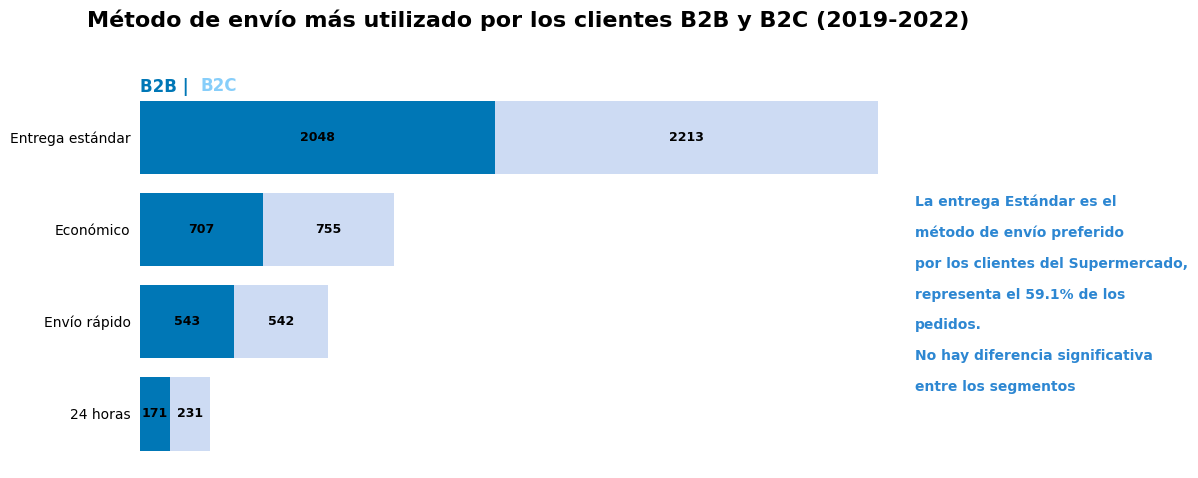

In [ ]:
def pregunta4():
  # Paso 1: Definir Variables
  global df_ventas, df_ventas_limpio
  # Paso 2: Preparación de los datos
  # Crea una copia de df_ventas_limpio
  df_modo_envio = df_ventas_limpio[['segmento_cliente','modo_envio']].copy()
  #Paso 3: Creamos una tabla cruzada entre modo envio y segmento cliente
  df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'],columns=df_modo_envio['segmento_cliente']).sort_values(by='B2B')
  #Paso 4: Creamos la Figura
  colores=['#0077b6','#CDDBF3']
  fig, ax = plt.subplots(figsize=(10,5))
  # Plotear las barras horizontales apiladas
  ax.barh(df_modo_envio.index,df_modo_envio['B2B'],color=colores[0])
  ax.barh(df_modo_envio.index,df_modo_envio['B2C'],left=df_modo_envio['B2B'],color=colores[1])
  # Agregar texto a las barras apiladas
  for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, fontweight='bold', color='black')
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.set_title('Método de envío más utilizado por los clientes B2B y B2C (2019-2022)',fontsize=16,pad=40,fontweight='bold')
  porcentaje=df_ventas_limpio['modo_envio'].value_counts(normalize=True)[0]*100
  ax.set_xticks([])
  ax.tick_params(axis='y', which='both', left=False)
  #Agregando texto
  ax.text(0, 3.55, "B2B | ", ha='left', va='center', color='#0077B6', fontsize=12, fontweight='bold')
  ax.text(350, 3.56, "B2C", ha='left', va='center', color='#87CEFA', fontsize=12, fontweight='bold')

  ax.text(1, 0.68, f'La entrega Estándar es el',transform=ax.transAxes, fontsize=10, color='#2D87D2',fontweight='bold')
  ax.text(1, 0.60,f'método de envío preferido',transform=ax.transAxes, fontsize=10,  color='#2D87D2',fontweight='bold')
  ax.text(1, 0.52,f'por los clientes del Supermercado,',transform=ax.transAxes, fontsize=10,  color='#2D87D2',fontweight='bold')
  ax.text(1, 0.44,f'representa el {round(porcentaje,2)}% de los',transform=ax.transAxes, fontsize=10,  color='#2D87D2',fontweight='bold')
  ax.text(1, 0.36,f'pedidos.',transform=ax.transAxes, fontsize=10,  color='#2D87D2',fontweight='bold')
  ax.text(1, 0.28,f'No hay diferencia significativa',transform=ax.transAxes, fontsize=10,  color='#2D87D2',fontweight='bold')
  ax.text(1, 0.20,f'entre los segmentos',transform=ax.transAxes, fontsize=10,  color='#2D87D2',fontweight='bold')
pregunta4()

##**Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?**

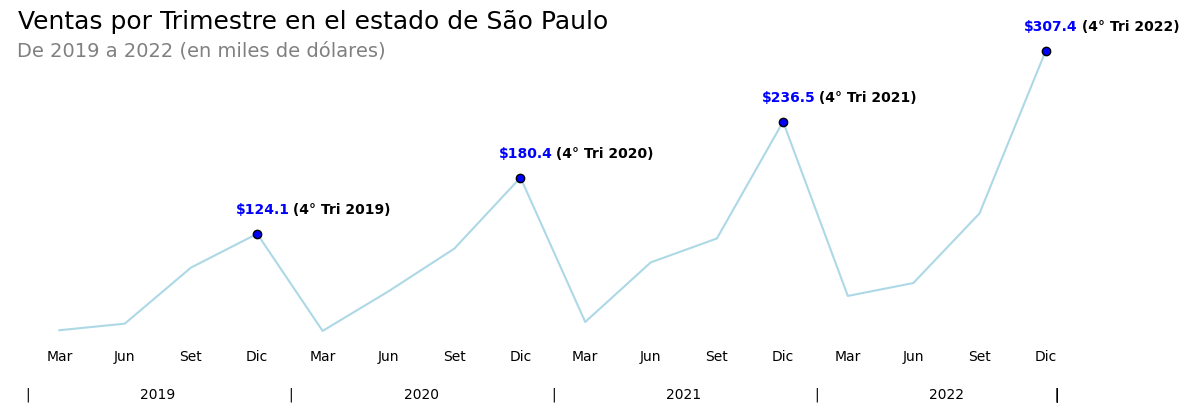

In [ ]:
def pregunta_5():
    # Filtrar filas donde el estado sea Sao Pualo
    # y seleccionar las columnas fecha_pedido y total_venta
    df_ventas_sp = df_ventas_limpio.copy()
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'][['fecha_pedido', 'total_venta']]

    # Establece como index la columna fecha_pedido
    df_ventas_sp.set_index('fecha_pedido', inplace=True)

    # Sumar las ventas totales por trimestre
    df_ventas_sp = df_ventas_sp.resample('Q').sum()

    # Expresa 'total_venta' en miles y redondea a dos decimales
    df_ventas_sp['total_venta'] = (df_ventas_sp['total_venta'] / 1000).round(1)

    # Restaura 'fecha_pedido' como columna
    df_ventas_sp.reset_index(inplace=True)

    # Creando el grafico

    fig, ax = plt.subplots(figsize=(14, 4))

    """ Gráfico de línea sobre las ventas totales trimestrales
    con marcadores en el 4to trimeste de cada año"""
    ax.plot(df_ventas_sp['fecha_pedido'], df_ventas_sp['total_venta'], marker='o', markevery=[i for i in range(3, len(df_ventas_sp), 4)],
        color='lightblue', markerfacecolor='blue', markeredgecolor='black')

    # Elimina los bordes
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Formato del  Titulo y subtitulo
    ax.set_title(' Ventas por Trimestre en el estado de São Paulo', loc='left', fontsize=18)
    fig.suptitle( 'De 2019 a 2022 (en miles de dólares)', x=0.13, y=0.87, ha='left', fontsize=14, color='gray')

    # Ocultar el eje y
    ax.get_yaxis().set_visible(False)

    # Configurar el eje x
    x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
    ax.set_xticks(df_ventas_sp.fecha_pedido)
    ax.set_xticklabels(x_labels, ha="center")
    ax.tick_params(axis='x', length=0, width=0, colors='black')

    # Poner el texto de total_venta y numero del trimestre y año
    for i in range(3, len(df_ventas_sp["total_venta"]), 4):
        trimestre = (i // 4) + 1
        year = df_ventas_sp["fecha_pedido"].iloc[i].year
        venta_text = f"${df_ventas_sp['total_venta'].iloc[i]}"
        trim_text = f' (4° Tri {year})'
        ax.text(df_ventas_sp.fecha_pedido.iloc[i] - pd.to_timedelta("30 days"), df_ventas_sp["total_venta"].iloc[i] + 20, venta_text, color='blue', fontweight='bold')
        ax.text(df_ventas_sp.fecha_pedido.iloc[i] + pd.to_timedelta("43 days"), df_ventas_sp["total_venta"].iloc[i] + 20, trim_text, fontweight='bold')


    # Obteniendo las cordenadas horizontales para el eje X
    for i in range(3, len(df_ventas_sp["total_venta"]), 4):
        year = df_ventas_sp["fecha_pedido"].iloc[i].year
        jun_date = pd.to_datetime(f"July 15, {year}")
        sep_date = pd.to_datetime(f"September 15, {year}")
        feb_date = pd.to_datetime(f"February 15, {year}")
        dec_22 = pd.to_datetime(f"January 15, 2023")
        mid_point = jun_date + (sep_date - jun_date) / 2
        # En el xlabel poner el año del trim y barras verticales
        ax.text(mid_point,  - 30, str(year), ha='center', va='top')  # Etiqueta de año
        ax.text(feb_date,  - 30, '|', ha='center', va='top')  # Etiqueta de |
        ax.text(dec_22,  - 30, '|', ha='center', va='top')  # Etiqueta de |


    plt.show()

pregunta_5()

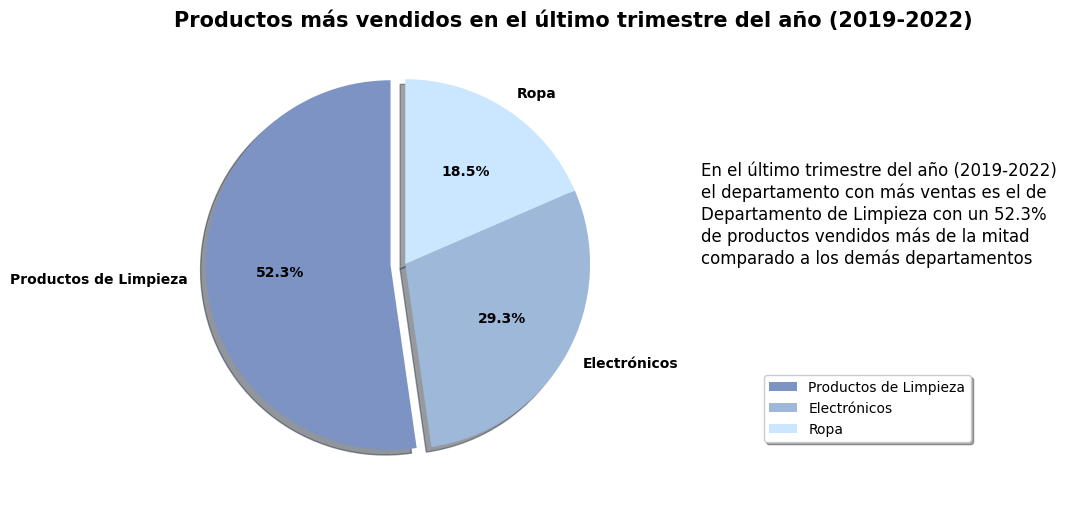

In [ ]:
def pregunta6():
  # Paso 1: Definir Variables
  global df_ventas_limpio
  # Paso 2: Preparación de los datos

  # Crea una copia de df_ventas_limpio
  df_ventas_tri = df_ventas_limpio[['fecha_pedido','departamento_producto','cantidad_pedido']].copy()

  # Filtramos la fecha de pedido solo el cuarto trimestre del año
  df_ventas_tri = df_ventas_tri[(df_ventas_tri['fecha_pedido'].dt.quarter == 4)]

  # Agrupamos por departamento y calculamos la cantidad vendida
  df_ventas_tri = df_ventas_tri.groupby('departamento_producto')['cantidad_pedido'].sum().reset_index()

  #Ordena los productos por la cantidad total vendida de forma descendente
  df_ventas_tri = df_ventas_tri.sort_values(by='cantidad_pedido', ascending=False)

  #Creamos la figura
  fig, ax = plt.subplots(figsize=(10,6))
  explodir=[0.08,0,0]
  ax.pie(df_ventas_tri['cantidad_pedido'], labels=df_ventas_tri['departamento_producto'], autopct='%1.1f%%', shadow=True,
         startangle=90, textprops={'weight': 'bold'}, explode=explodir, colors=['#7C93C3','#9EB8D9','#CAE7FF'])
  ax.set_title('Productos más vendidos en el último trimestre del año (2019-2022)', fontsize=15, pad=5, loc='left', weight='bold')

  # Añadir comentario
  ax.text(1.6,0.48,"En el último trimestre del año (2019-2022)",fontsize=12)
  ax.text(1.6,0.36,"el departamento con más ventas es el de ",fontsize=12)
  ax.text(1.6,0.24,"Departamento de Limpieza con un 52.3% ",fontsize=12)
  ax.text(1.6,0.12,"de productos vendidos más de la mitad ",fontsize=12)
  ax.text(1.6,0.0,"comparado a los demás departamentos",fontsize=12)

  # Agregar leyenda
  ax.legend(df_ventas_tri['departamento_producto'], loc='lower center', bbox_to_anchor=(1.5, 0.1), shadow=True)
  plt.show()
pregunta6()